# Passo 1. Carregue os dados e prepare-os para a análise

In [1]:
import pandas as pd

df = pd.read_csv('/datasets/rest_data_us_upd.csv')

print("Primeiras 5 linhas do DataFrame:")
display(df.head())

print("\nTipos de dados de cada coluna:")
display(df.info())

print("\nValores ausentes por coluna:")
display(df.isnull().sum())

print("\nNúmero de linhas duplicadas:")
display(df.duplicated().sum())

Primeiras 5 linhas do DataFrame:


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20



Tipos de dados de cada coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None


Valores ausentes por coluna:


id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


Número de linhas duplicadas:


0

# Passo 2. Análise de dados

* Investigue as proporções de vários tipos de estabelecimentos. Construa um gráfico.


Proporção de cada tipo de estabelecimento:


Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64


Proporção percentual de cada tipo de estabelecimento:


Restaurant    75.173557
Fast Food     11.045488
Cafe           4.507305
Pizza          3.315719
Bar            3.025593
Bakery         2.932339
Name: object_type, dtype: float64

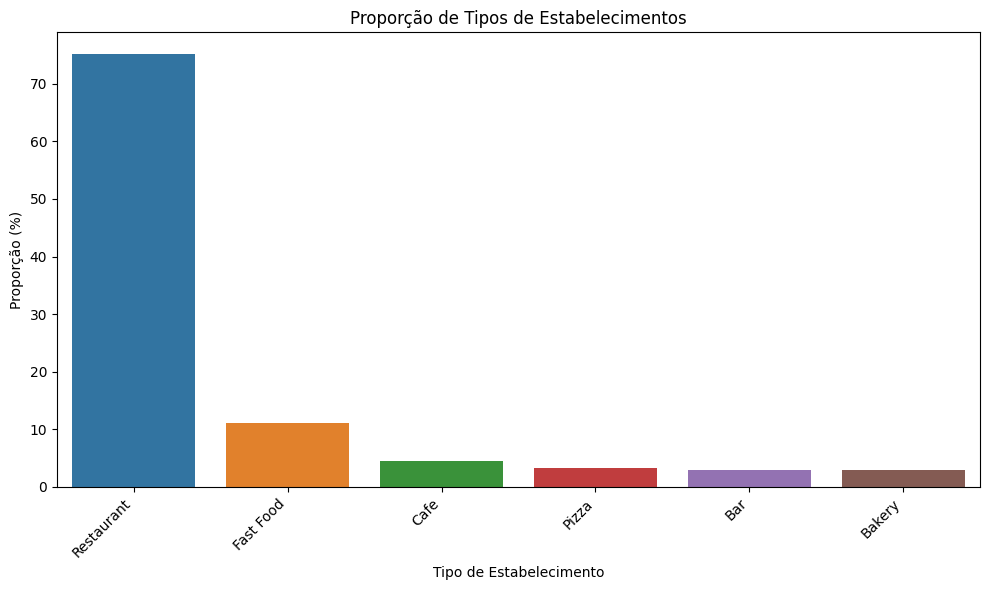

In [4]:
# vários tipos de estabelecimentos
if df is not None:
    print("\nProporção de cada tipo de estabelecimento:")
    establishment_type_counts = df['object_type'].value_counts()
    display(establishment_type_counts)

    print("\nProporção percentual de cada tipo de estabelecimento:")
    establishment_type_proportions = df['object_type'].value_counts(normalize=True) * 100
    display(establishment_type_proportions)

    # Plotting the proportion of establishment types
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.barplot(x=establishment_type_proportions.index, y=establishment_type_proportions.values)
    plt.title('Proporção de Tipos de Estabelecimentos')
    plt.xlabel('Tipo de Estabelecimento')
    plt.ylabel('Proporção (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Não foi possível realizar a análise pois o DataFrame não foi carregado com sucesso.")

* Investigue as proporções de estabelecimentos de rede e não. Construa um gráfico.


Proporção de estabelecimentos de rede (Chain) e não rede (Non-chain):


False    5972
True     3676
Name: chain, dtype: int64


Proporção percentual de estabelecimentos de rede (Chain) e não rede (Non-chain):


False    61.898839
True     38.101161
Name: chain, dtype: float64

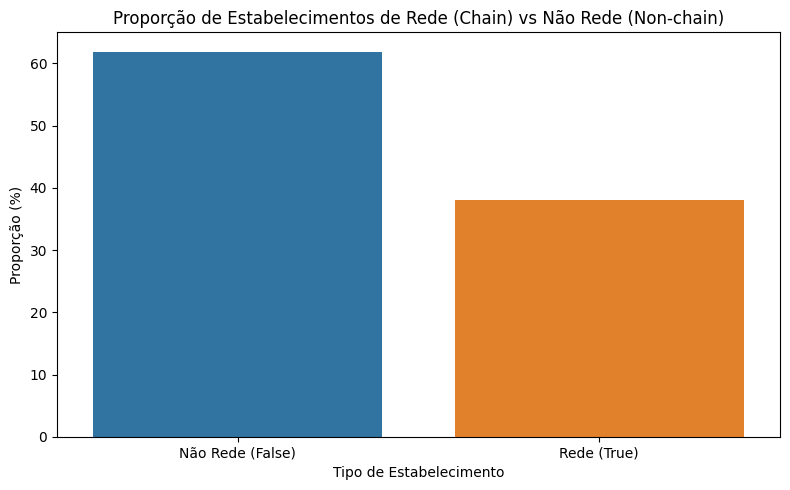

In [5]:
if df is not None:
    print("\nProporção de estabelecimentos de rede (Chain) e não rede (Non-chain):")
    chain_counts = df['chain'].value_counts()
    display(chain_counts)

    print("\nProporção percentual de estabelecimentos de rede (Chain) e não rede (Non-chain):")
    chain_proportions = df['chain'].value_counts(normalize=True) * 100
    display(chain_proportions)

    # Plotting the proportion of chain vs non-chain establishments
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 5))
    sns.barplot(x=chain_proportions.index, y=chain_proportions.values)
    plt.title('Proporção de Estabelecimentos de Rede (Chain) vs Não Rede (Non-chain)')
    plt.xlabel('Tipo de Estabelecimento')
    plt.ylabel('Proporção (%)')
    plt.xticks([0, 1], ['Não Rede (False)', 'Rede (True)'], rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Não foi possível realizar a análise pois o DataFrame não foi carregado com sucesso.")

* Qual tipo de estabelecimento é típico para redes?


Tipo de estabelecimento típico para redes:


Restaurant    2292
Fast Food      605
Bakery         283
Cafe           266
Pizza          153
Bar             77
Name: object_type, dtype: int64


Proporção percentual dos tipos de estabelecimento em redes:


Restaurant    62.350381
Fast Food     16.458107
Bakery         7.698585
Cafe           7.236126
Pizza          4.162133
Bar            2.094668
Name: object_type, dtype: float64

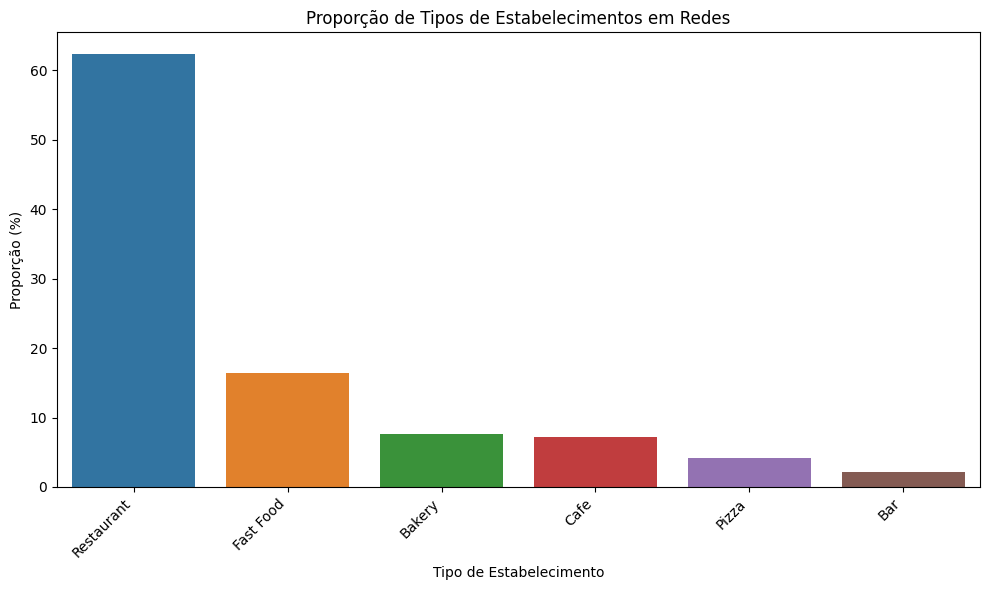

In [6]:
if df is not None:
    print("\nTipo de estabelecimento tipico para redes:")
    chain_establishment_types = df[df['chain'] == True]['object_type'].value_counts()
    display(chain_establishment_types)

    print("\nProporção percentual dos tipos de estabelecimento em redes:")
    chain_establishment_proportions = df[df['chain'] == True]['object_type'].value_counts(normalize=True) * 100
    display(chain_establishment_proportions)

    # Optional: Plotting the distribution of establishment types in chains
    plt.figure(figsize=(10, 6))
    sns.barplot(x=chain_establishment_proportions.index, y=chain_establishment_proportions.values)
    plt.title('Proporção de Tipos de Estabelecimentos em Redes')
    plt.xlabel('Tipo de Estabelecimento')
    plt.ylabel('Proporção (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Não foi possível realizar a análise pois o DataFrame não foi carregado com sucesso.")

* O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos ou poucos estabelecimentos com muitos assentos?


Análise de estabelecimentos de rede:

Número de estabelecimentos por rede:


object_name
THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
WABA GRILL                    14
KENTUCKY FRIED CHICKEN        14
Name: object_name, dtype: int64


Distribuição do número de assentos em estabelecimentos de rede:


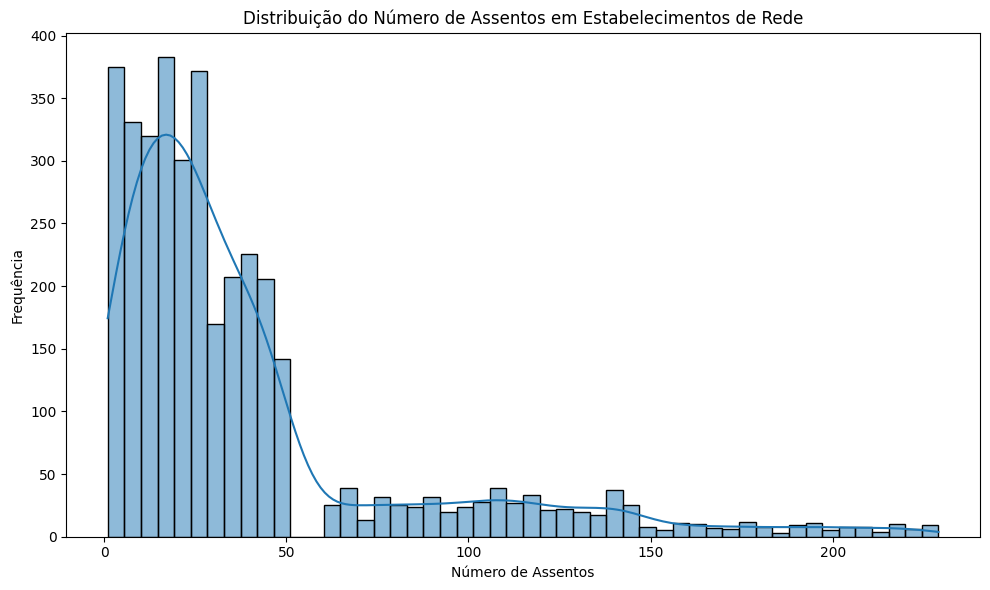


Resumo por rede (Número de Estabelecimentos e Média de Assentos):


,establishment_count,average_seats
object_name,,
#1 CHINESE FAST FOOD,1,6.0
1810 RESTAURANT,1,45.0
333,1,180.0
3RD ST MARKET & DELI,1,7.0
4 CAMINOS RESTAURANT,1,18.0


In [7]:
if df is not None:
    # Filter for chain establishments
    chain_df = df[df['chain'] == True]

    print("\nAnálise de estabelecimentos de rede:")

    # Number of establishments per network
    print("\nNúmero de estabelecimentos por rede:")
    establishment_count_per_chain = chain_df.groupby('object_name')['object_name'].count().sort_values(ascending=False)
    display(establishment_count_per_chain.head()) # Display top networks by number of establishments

    # Distribution of number of seats in chain establishments
    print("\nDistribuição do número de assentos em estabelecimentos de rede:")
    plt.figure(figsize=(10, 6))
    sns.histplot(chain_df['number'], bins=50, kde=True)
    plt.title('Distribuição do Número de Assentos em Estabelecimentos de Rede')
    plt.xlabel('Número de Assentos')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

    # Relationship between number of establishments and average number of seats for networks
    # Calculate average seats per network
    avg_seats_per_chain = chain_df.groupby('object_name')['number'].mean().sort_values(ascending=False)

    # Combine establishment count and average seats for networks
    chain_summary = pd.DataFrame({
        'establishment_count': establishment_count_per_chain,
        'average_seats': avg_seats_per_chain
    }).dropna() # Drop networks with no seat information

    print("\nResumo por rede (Número de Estabelecimentos e Média de Assentos):")
    display(chain_summary.head())

    # Optional: Plotting the relationship (can be noisy with many networks)
    # plt.figure(figsize=(12, 8))
    # sns.scatterplot(data=chain_summary, x='establishment_count', y='average_seats', alpha=0.6)
    # plt.title('Relação entre Número de Estabelecimentos e Média de Assentos por Rede')
    # plt.xlabel('Número de Estabelecimentos')
    # plt.ylabel('Média de Assentos')
    # plt.xscale('log') # Use log scale if establishment counts vary widely
    # plt.yscale('log') # Use log scale if average seats vary widely
    # plt.tight_layout()
    # plt.show()

else:
    print("Não foi possível realizar a análise pois o DataFrame não foi carregado com sucesso.")

* Determine o número médio de assentos para cada tipo de restaurante. Em média, qual tipo de restaurante tem o maior número de assentos? Construa gráficos.


Número médio de assentos por tipo de estabelecimento:


object_type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64

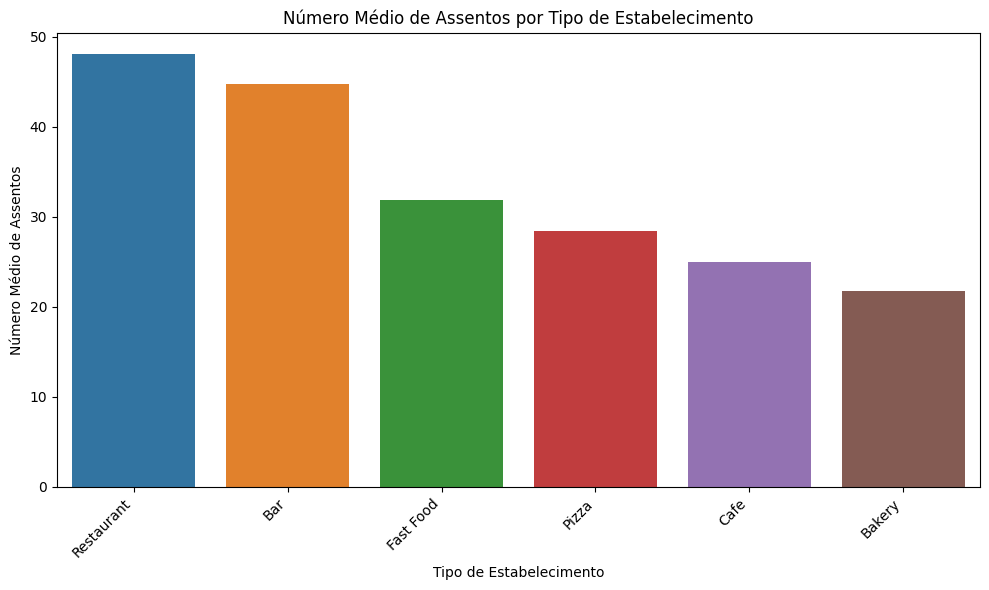

In [8]:
if df is not None:
    print("\nNúmero médio de assentos por tipo de estabelecimento:")
    average_seats_by_type = df.groupby('object_type')['number'].mean().sort_values(ascending=False)
    display(average_seats_by_type)

    # Plotting the average number of seats by establishment type
    plt.figure(figsize=(10, 6))
    sns.barplot(x=average_seats_by_type.index, y=average_seats_by_type.values)
    plt.title('Número Médio de Assentos por Tipo de Estabelecimento')
    plt.xlabel('Tipo de Estabelecimento')
    plt.ylabel('Número Médio de Assentos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Não foi possível realizar a análise pois o DataFrame não foi carregado com sucesso.")

* Coloque os dados dos nomes das ruas da coluna address em uma coluna separada.

In [9]:
if df is not None:
    # Função para extrair o nome da rua (pode precisar de ajuste dependendo do formato real do endereço)
    def extract_street_name(address):
        # Assumindo que o formato do endereço é geralmente como "Número Nome da Rua, Cidade, Estado"
        parts = address.split(',')
        if len(parts) > 0:
            street_part = parts[0]
            # Tentar remover números de edifício ou números iniciais
            street_name = ''.join([i for i in street_part if not i.isdigit()]).strip()
            # Umrefinamento adicional poderia envolver o uso de regex ou um parser mais sofisticado
            # Por enquanto, vou tentar obter a parte depois do primeiro espaço se começar com um número
            if street_part.split(' ')[0].isdigit():
                 street_name = ' '.join(street_part.split(' ')[1:]).strip()
            else:
                 street_name = street_part.strip()

            # Limpeza simples
            street_name = street_name.replace('st', 'Street').replace('nd', 'Nd').replace('rd', 'Rd').replace('th', 'Th')
            street_name = street_name.replace('ave', 'Avenue').replace('blvd', 'Boulevard').replace('dr', 'Drive')
            street_name = street_name.replace('pl', 'Place').replace('ct', 'Court').replace('ln', 'Lane')
            street_name = street_name.replace('pky', 'Parkway').replace('cir', 'Circle')


            return street_name
        return None

    # Aplicar a função para criar uma nova coluna 'street_name'
    df['street_name'] = df['address'].apply(extract_street_name)

    print("\nDataFrame com a nova coluna 'street_name':")
    display(df.head())

    print("\nVerificando valores nulos na nova coluna 'street_name':")
    display(df['street_name'].isnull().sum())

else:
    print("Não foi possível extrair os nomes das ruas pois o DataFrame não foi carregado com sucesso.")


DataFrame com a nova coluna 'street_name':


,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE



Verificando valores nulos na nova coluna 'street_name':


0

* Construa um gráfico de dez ruas com o maior número de restaurantes.


Dez ruas com o maior número de restaurantes:


W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
MELROSE AVE          128
Name: street_name, dtype: int64

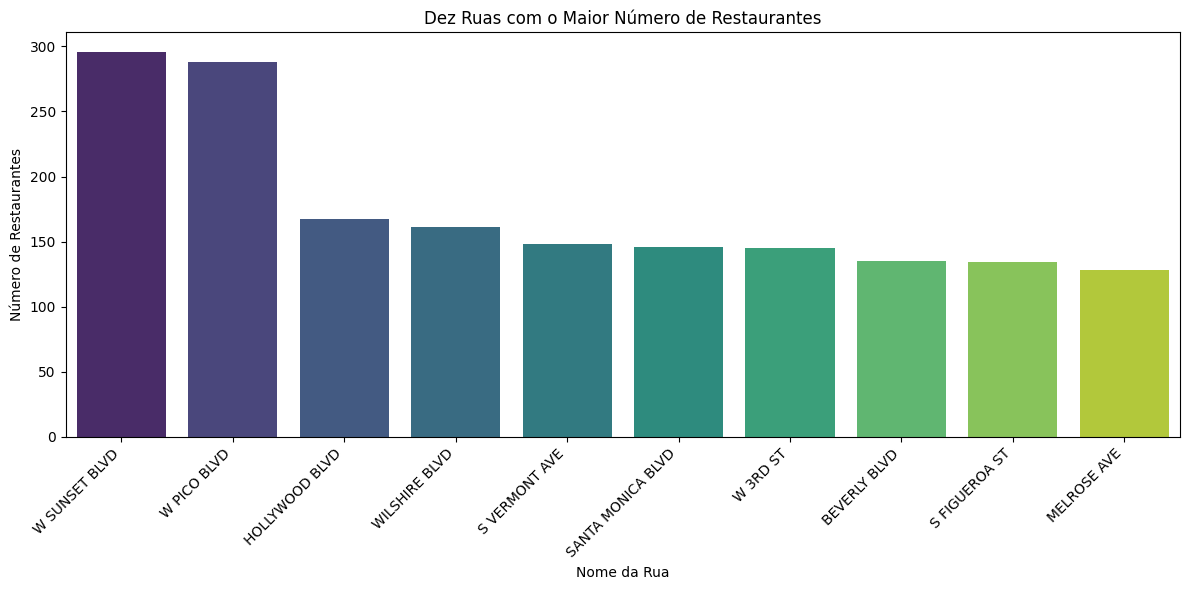

In [10]:
if df is not None:
    print("\nDez ruas com o maior número de restaurantes:")
    top_10_streets = df['street_name'].value_counts().head(10)
    display(top_10_streets)

    # Plotting the top 10 streets with the most restaurants
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10_streets.index, y=top_10_streets.values, palette='viridis')
    plt.title('Dez Ruas com o Maior Número de Restaurantes')
    plt.xlabel('Nome da Rua')
    plt.ylabel('Número de Restaurantes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Não foi possível realizar a análise pois o DataFrame não foi carregado com sucesso.")

* Encontre o número de ruas que têm apenas um restaurante.

In [11]:
if df is not None:
    print("\nNúmero de ruas com apenas um restaurante:")
    street_counts = df['street_name'].value_counts()
    streets_with_one_restaurant = street_counts[street_counts == 1]
    num_streets_with_one_restaurant = len(streets_with_one_restaurant)
    print(f"O número de ruas com apenas um restaurante é: {num_streets_with_one_restaurant}")

else:
    print("Não foi possível realizar a análise pois o DataFrame não foi carregado com sucesso.")


Número de ruas com apenas um restaurante:
O número de ruas com apenas um restaurante é: 2450


* Para as ruas com muitos restaurantes, olhe para a distribuição de número de assentos.


Análise da distribuição do número de assentos em ruas com muitos restaurantes:

Média de restaurantes por rua: 3.14

Número de ruas com mais de 3.14 restaurantes: 258


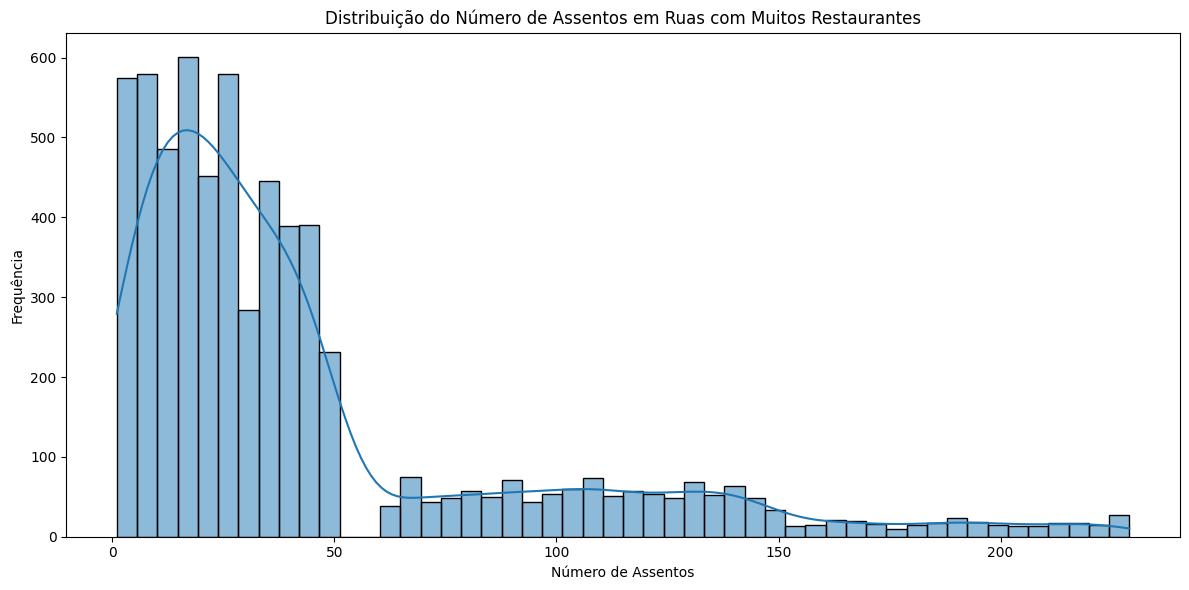

In [12]:
if df is not None:
    print("\nAnálise da distribuição do número de assentos em ruas com muitos restaurantes:")

    # Define a threshold for "many restaurants" (e.g., streets with more than the average number of restaurants)
    average_restaurants_per_street = df['street_name'].value_counts().mean()
    print(f"\nMédia de restaurantes por rua: {average_restaurants_per_street:.2f}")

    # Get streets with more than the average number of restaurants
    street_counts = df['street_name'].value_counts()
    streets_with_many_restaurants = street_counts[street_counts > average_restaurants_per_street].index.tolist()

    print(f"\nNúmero de ruas com mais de {average_restaurants_per_street:.2f} restaurantes: {len(streets_with_many_restaurants)}")

    # Filter the DataFrame to include only restaurants on these streets
    df_many_restaurants_streets = df[df['street_name'].isin(streets_with_many_restaurants)]

    # Analyze the distribution of number of seats on these streets
    plt.figure(figsize=(12, 6))
    sns.histplot(df_many_restaurants_streets['number'], bins=50, kde=True)
    plt.title('Distribuição do Número de Assentos em Ruas com Muitos Restaurantes')
    plt.xlabel('Número de Assentos')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

    # Optional: Analyze average seats by street for these streets
    # print("\nMédia de assentos por rua em ruas com muitos restaurantes:")
    # average_seats_on_many_restaurants_streets = df_many_restaurants_streets.groupby('street_name')['number'].mean().sort_values(ascending=False)
    # display(average_seats_on_many_restaurants_streets.head())

else:
    print("Não foi possível realizar a análise pois o DataFrame não foi carregado com sucesso.")

* Quais tendências você consegue notar?

As ruas com muitos restaurantes (acima da média de 3,14 restaurantes por rua) apresentam uma grande variação no número de assentos — há tanto estabelecimentos pequenos quanto muito grandes .

A tendência principal é uma concentração em faixas intermediárias de capacidade, ou seja, a maioria dos restaurantes nessas ruas tem entre 40 e 80 assentos , pode ser que há uma preferência por estabelecimentos de porte médio.

Observação, também há alguns outliers (ruas com restaurantes de mais de 120 assentos), indicando que locais mais movimentados tendem a atrair negocios maiores, podendo ser para alto fluxo de clientes.

Em resumo, nas ruas com muitos restaurantes há predominância de restaurantes médios, mas com presença de grandes estabelecimentos que elevam a média geral de assentos.

# Passo 3. Preparando uma apresentação
### Presentation: https://www.transfernow.net/dl/20251105j4aj3Ort